# Time series

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## Date and Time Data Types and Tools

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2016, 2, 6, 16, 7, 46, 641068)

In [4]:
now.year, now.month, now.day

(2016, 2, 6)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

In [10]:
stamp = datetime(2011, 1, 3)

In [11]:
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [13]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [15]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [17]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [18]:
datestrs

['7/6/2011', '8/6/2011']

In [19]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None, tz=None)

In [20]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None, tz=None)

In [21]:
idx[2]

NaT

In [22]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## Time Series Basics

In [23]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.872863
2011-01-05    0.924759
2011-01-07   -0.147168
2011-01-08   -0.145694
2011-01-10    1.323087
2011-01-12   -0.987038
dtype: float64

In [24]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [25]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None, tz=None)

In [26]:
ts + ts[::2]

2011-01-02    1.745726
2011-01-05         NaN
2011-01-07   -0.294337
2011-01-08         NaN
2011-01-10    2.646174
2011-01-12         NaN
dtype: float64

In [27]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [28]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

In [29]:
stamp = ts.index[2]
ts[stamp]

-0.14716832684633374

In [30]:
ts['1/10/2011']

1.3230871098156172

In [31]:
ts['20110110']

1.3230871098156172

In [32]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.107307
2000-01-02   -0.870408
2000-01-03    0.588903
2000-01-04    0.766940
2000-01-05    1.805385
2000-01-06    0.103458
                ...   
2002-09-21   -0.271109
2002-09-22   -1.589216
2002-09-23   -1.272490
2002-09-24   -1.351653
2002-09-25    0.972235
2002-09-26    0.766319
Freq: D, dtype: float64

In [33]:
longer_ts['2001']

2001-01-01   -0.243424
2001-01-02    1.762640
2001-01-03   -1.486696
2001-01-04    1.557670
2001-01-05    0.622366
2001-01-06   -1.390293
                ...   
2001-12-26   -1.881836
2001-12-27    0.423992
2001-12-28   -0.309550
2001-12-29   -2.048222
2001-12-30    0.055794
2001-12-31    1.399845
Freq: D, dtype: float64

In [34]:
longer_ts['2001-05']

2001-05-01    0.604793
2001-05-02   -1.693451
2001-05-03   -0.020012
2001-05-04    1.478443
2001-05-05   -1.986256
2001-05-06    1.316917
                ...   
2001-05-26    2.722542
2001-05-27   -0.149726
2001-05-28   -0.084055
2001-05-29    0.243916
2001-05-30    0.165169
2001-05-31   -1.118828
Freq: D, dtype: float64

In [35]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.147168
2011-01-08   -0.145694
2011-01-10    1.323087
2011-01-12   -0.987038
dtype: float64

In [36]:
ts

2011-01-02    0.872863
2011-01-05    0.924759
2011-01-07   -0.147168
2011-01-08   -0.145694
2011-01-10    1.323087
2011-01-12   -0.987038
dtype: float64

In [37]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.147168
2011-01-08   -0.145694
2011-01-10    1.323087
dtype: float64

In [38]:
ts.truncate(after='1/9/2011')

2011-01-02    0.872863
2011-01-05    0.924759
2011-01-07   -0.147168
2011-01-08   -0.145694
dtype: float64

In [39]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.055920,0.710810,-0.027330,-0.976627
2001-05-09,0.066661,1.031460,-1.247689,1.455885
2001-05-16,0.595076,0.550129,-0.880514,2.045204
2001-05-23,-1.348091,-1.017902,1.007193,-0.235169
2001-05-30,0.689329,-0.612180,0.716090,0.793397


### Time series with duplicate indices

In [40]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [41]:
dup_ts.index.is_unique

False

In [42]:
dup_ts['1/3/2000']  # not duplicated

4

In [43]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [44]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [45]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, Frequencies, and Shifting

In [46]:
ts

2011-01-02    0.872863
2011-01-05    0.924759
2011-01-07   -0.147168
2011-01-08   -0.145694
2011-01-10    1.323087
2011-01-12   -0.987038
dtype: float64

In [47]:
ts.resample('D')

2011-01-02    0.872863
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.924759
2011-01-06         NaN
2011-01-07   -0.147168
2011-01-08   -0.145694
2011-01-09         NaN
2011-01-10    1.323087
2011-01-11         NaN
2011-01-12   -0.987038
Freq: D, dtype: float64

### Generating date ranges

In [48]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [49]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [50]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [51]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM', tz=None)

In [52]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [53]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

### Frequencies and Date Offsets

In [54]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [55]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [56]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H', tz=None)

In [57]:
Hour(2) + Minute(30)

<150 * Minutes>

In [58]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T', tz=None)

#### Week of month dates

In [59]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', offset='WOM-3FRI')]

### Shifting (leading and lagging) data

In [60]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.419592
2000-02-29    0.787347
2000-03-31    0.213046
2000-04-30   -1.423888
Freq: M, dtype: float64

In [61]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.419592
2000-04-30    0.787347
Freq: M, dtype: float64

In [62]:
ts.shift(-2)

2000-01-31    0.213046
2000-02-29   -1.423888
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [63]:
ts.shift(2, freq='M')

2000-03-31    1.419592
2000-04-30    0.787347
2000-05-31    0.213046
2000-06-30   -1.423888
Freq: M, dtype: float64

In [64]:
ts.shift(3, freq='D')

2000-02-03    1.419592
2000-03-03    0.787347
2000-04-03    0.213046
2000-05-03   -1.423888
dtype: float64

In [65]:
ts.shift(1, freq='3D')

2000-02-03    1.419592
2000-03-03    0.787347
2000-04-03    0.213046
2000-05-03   -1.423888
dtype: float64

In [66]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.419592
2000-02-29 01:30:00    0.787347
2000-03-31 01:30:00    0.213046
2000-04-30 01:30:00   -1.423888
dtype: float64

#### Shifting dates with offsets

In [67]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [68]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [69]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [70]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [71]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [72]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.152326
2000-02-29   -0.309663
2000-03-31   -0.476857
dtype: float64

In [73]:
ts.resample('M', how='mean')

2000-01-31   -0.152326
2000-02-29   -0.309663
2000-03-31   -0.476857
Freq: M, dtype: float64

## Time Zone Handling

In [74]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [75]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localization and Conversion

In [76]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [77]:
print(ts.index.tz)

None


In [78]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns]', freq='D', tz='UTC')

In [79]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.643341
2012-03-10 09:30:00+00:00    1.118683
2012-03-11 09:30:00+00:00   -0.442149
2012-03-12 09:30:00+00:00   -0.912012
2012-03-13 09:30:00+00:00    1.056717
2012-03-14 09:30:00+00:00    0.243979
Freq: D, dtype: float64

In [80]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns]', freq='D', tz='UTC')

In [81]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -0.643341
2012-03-10 04:30:00-05:00    1.118683
2012-03-11 05:30:00-04:00   -0.442149
2012-03-12 05:30:00-04:00   -0.912012
2012-03-13 05:30:00-04:00    1.056717
2012-03-14 05:30:00-04:00    0.243979
Freq: D, dtype: float64

In [82]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.643341
2012-03-10 14:30:00+00:00    1.118683
2012-03-11 13:30:00+00:00   -0.442149
2012-03-12 13:30:00+00:00   -0.912012
2012-03-13 13:30:00+00:00    1.056717
2012-03-14 13:30:00+00:00    0.243979
Freq: D, dtype: float64

In [83]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.643341
2012-03-10 15:30:00+01:00    1.118683
2012-03-11 14:30:00+01:00   -0.442149
2012-03-12 14:30:00+01:00   -0.912012
2012-03-13 14:30:00+01:00    1.056717
2012-03-14 14:30:00+01:00    0.243979
Freq: D, dtype: float64

In [84]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns]', freq='D', tz='Asia/Shanghai')

### Operations with time zone-aware Timestamp objects

In [85]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [86]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [87]:
stamp_utc.value

1299902400000000000

In [88]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [89]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [90]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [91]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [92]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations between different time zones

In [93]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    1.366959
2012-03-08 09:30:00   -0.816429
2012-03-09 09:30:00   -0.405971
2012-03-12 09:30:00    0.212991
2012-03-13 09:30:00   -1.259865
2012-03-14 09:30:00   -0.216293
2012-03-15 09:30:00    0.010963
2012-03-16 09:30:00   -0.787804
2012-03-19 09:30:00   -0.083656
2012-03-20 09:30:00    0.329496
Freq: B, dtype: float64

In [94]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns]', freq='B', tz='UTC')

## Periods and Period Arithmetic

In [95]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [96]:
p + 5

Period('2012', 'A-DEC')

In [97]:
p - 2

Period('2005', 'A-DEC')

In [98]:
pd.Period('2014', freq='A-DEC') - p

7

In [99]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [100]:
Series(np.random.randn(6), index=rng)

2000-01   -0.976864
2000-02    2.022332
2000-03    0.263676
2000-04    0.114384
2000-05    0.531095
2000-06   -1.297501
Freq: M, dtype: float64

In [101]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

### Period Frequency Conversion

In [102]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [103]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [104]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [105]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [106]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [107]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.824913
2007    1.100120
2008   -1.769046
2009   -0.200349
Freq: A-DEC, dtype: float64

In [108]:
ts.asfreq('M', how='start')

2006-01    0.824913
2007-01    1.100120
2008-01   -1.769046
2009-01   -0.200349
Freq: M, dtype: float64

In [109]:
ts.asfreq('B', how='end')

2006-12-29    0.824913
2007-12-31    1.100120
2008-12-31   -1.769046
2009-12-31   -0.200349
Freq: B, dtype: float64

### Quarterly period frequencies

In [110]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [111]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [112]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [113]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [114]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [115]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [116]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and back)

In [117]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    1.018399
2000-02-29   -0.267090
2000-03-31   -0.810393
Freq: M, dtype: float64

In [118]:
pts

2000-01    1.018399
2000-02   -0.267090
2000-03   -0.810393
Freq: M, dtype: float64

In [119]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01    0.540025
2000-01    0.078357
2000-01   -1.561095
2000-02    0.102790
2000-02    2.029049
2000-02   -1.043724
Freq: M, dtype: float64

In [120]:
pts = ts.to_period()
pts

2000-01    1.018399
2000-02   -0.267090
2000-03   -0.810393
Freq: M, dtype: float64

In [121]:
pts.to_timestamp(how='end')

2000-01-31    1.018399
2000-02-29   -0.267090
2000-03-31   -0.810393
Freq: M, dtype: float64

### Creating a PeriodIndex from arrays

In [122]:
data = pd.read_csv('ch08/macrodata.csv')
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
5      1960
       ... 
197    2008
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, dtype: float64

In [123]:
data.quarter

0      1
1      2
2      3
3      4
4      1
5      2
      ..
197    2
198    3
199    4
200    1
201    2
202    3
Name: quarter, dtype: float64

In [124]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2', 
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [125]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

## Resampling and Frequency Conversion

In [126]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M', how='mean')

2000-01-31   -0.240872
2000-02-29   -0.013665
2000-03-31   -0.075256
2000-04-30    0.046833
Freq: M, dtype: float64

In [127]:
ts.resample('M', how='mean', kind='period')

2000-01   -0.240872
2000-02   -0.013665
2000-03   -0.075256
2000-04    0.046833
Freq: M, dtype: float64

### Downsampling

In [128]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [129]:
ts.resample('5min', how='sum')
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [130]:
ts.resample('5min', how='sum', closed='left')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [131]:
ts.resample('5min', how='sum', closed='left', label='left')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [132]:
ts.resample('5min', how='sum', loffset='-1s')

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [133]:
ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

In [134]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [135]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

In [136]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-3.029805,1.258387,-0.854530,-0.374015
2000-01-12,1.491826,0.346842,-0.434376,1.273713


In [137]:
df_daily = frame.resample('D')
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-3.029805,1.258387,-0.854530,-0.374015
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.491826,0.346842,-0.434376,1.273713


In [138]:
frame.resample('D', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000-01-05,-3.029805,1.258387,-0.854530,-0.374015
2000-01-06,-3.029805,1.258387,-0.854530,-0.374015
2000-01-07,-3.029805,1.258387,-0.854530,-0.374015
2000-01-08,-3.029805,1.258387,-0.854530,-0.374015
2000-01-09,-3.029805,1.258387,-0.854530,-0.374015
2000-01-10,-3.029805,1.258387,-0.854530,-0.374015
2000-01-11,-3.029805,1.258387,-0.854530,-0.374015
2000-01-12,1.491826,0.346842,-0.434376,1.273713


In [139]:
frame.resample('D', fill_method='ffill', limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-3.029805,1.258387,-0.854530,-0.374015
2000-01-06,-3.029805,1.258387,-0.854530,-0.374015
2000-01-07,-3.029805,1.258387,-0.854530,-0.374015
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.491826,0.346842,-0.434376,1.273713


In [140]:
frame.resample('W-THU', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000-01-06,-3.029805,1.258387,-0.854530,-0.374015
2000-01-13,1.491826,0.346842,-0.434376,1.273713


### Resampling with periods

In [141]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.760269,-0.066799,-0.363913,0.922143
2000-02,0.321776,0.479610,-0.440752,0.941830
2000-03,-1.000282,-0.653274,0.283776,-0.630121
2000-04,-1.371750,-1.702993,0.185643,0.437110
2000-05,0.554198,1.476945,-0.299560,-2.092157


In [142]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.189009,-0.076728,-0.136254,0.004716
2001,0.251378,-0.228544,0.535467,0.413650


In [143]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

,Colorado,Texas,New York,Ohio
2000Q1,0.189009,-0.076728,-0.136254,0.004716
2000Q2,0.189009,-0.076728,-0.136254,0.004716
2000Q3,0.189009,-0.076728,-0.136254,0.004716
2000Q4,0.189009,-0.076728,-0.136254,0.004716
2001Q1,0.251378,-0.228544,0.535467,0.413650
2001Q2,0.251378,-0.228544,0.535467,0.413650
2001Q3,0.251378,-0.228544,0.535467,0.413650
2001Q4,0.251378,-0.228544,0.535467,0.413650


In [144]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

,Colorado,Texas,New York,Ohio
2000Q1,0.189009,-0.076728,-0.136254,0.004716
2000Q2,0.189009,-0.076728,-0.136254,0.004716
2000Q3,0.189009,-0.076728,-0.136254,0.004716
2000Q4,0.189009,-0.076728,-0.136254,0.004716
2001Q1,0.251378,-0.228544,0.535467,0.413650
2001Q2,0.251378,-0.228544,0.535467,0.413650
2001Q3,0.251378,-0.228544,0.535467,0.413650
2001Q4,0.251378,-0.228544,0.535467,0.413650


In [145]:
annual_frame.resample('Q-MAR', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000Q4,0.189009,-0.076728,-0.136254,0.004716
2001Q1,0.189009,-0.076728,-0.136254,0.004716
2001Q2,0.189009,-0.076728,-0.136254,0.004716
2001Q3,0.189009,-0.076728,-0.136254,0.004716
2001Q4,0.251378,-0.228544,0.535467,0.413650
2002Q1,0.251378,-0.228544,0.535467,0.413650
2002Q2,0.251378,-0.228544,0.535467,0.413650
2002Q3,0.251378,-0.228544,0.535467,0.413650


## Time series plotting

In [146]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


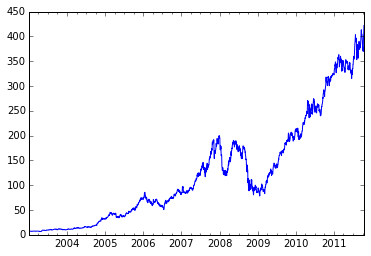

In [147]:
close_px['AAPL'].plot()

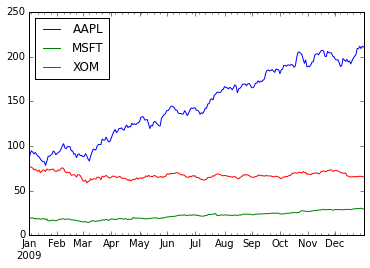

In [148]:
close_px.ix['2009'].plot()

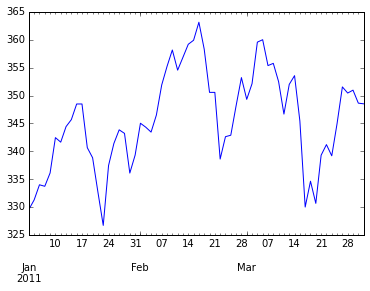

In [149]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

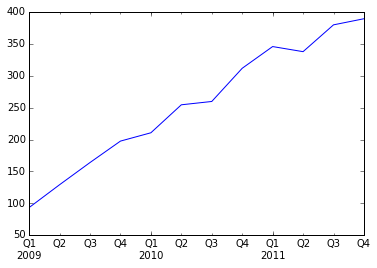

In [150]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009':].plot()

## Moving window functions

In [151]:
close_px = close_px.asfreq('B').fillna(method='ffill')

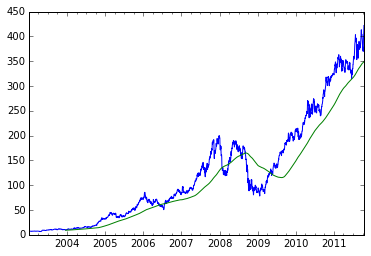

In [152]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

In [153]:
plt.figure()

In [154]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, dtype: float64

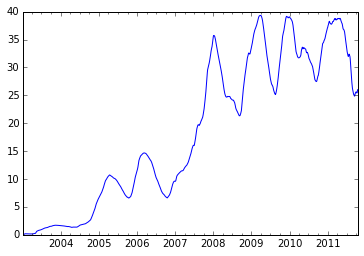

In [155]:
appl_std250.plot()

In [156]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

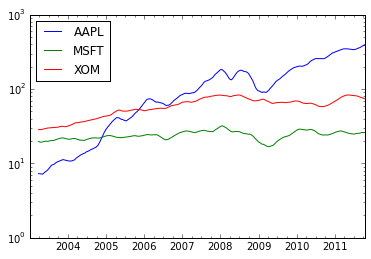

In [157]:
pd.rolling_mean(close_px, 60).plot(logy=True)

In [158]:
plt.close('all')

### Exponentially-weighted functions

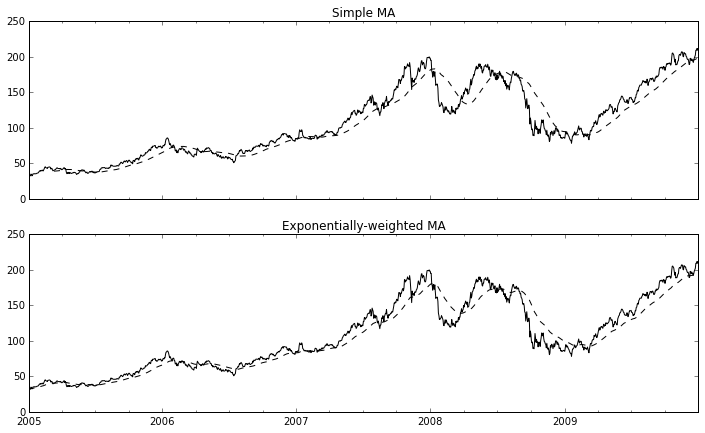

In [159]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### Binary moving window functions

In [160]:
close_px
spx_px = close_px_all['SPX']

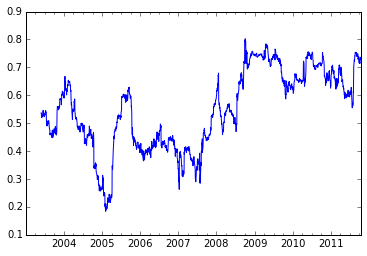

In [161]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

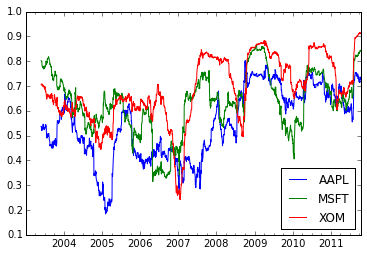

In [162]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### User-defined moving window functions

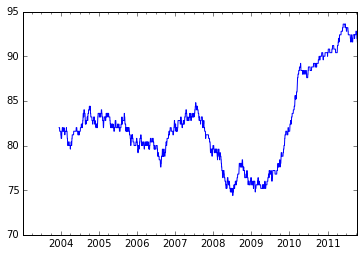

In [163]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

## Performance and Memory Usage Notes

In [164]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000   -0.053265
2000-01-01 00:00:00.010   -0.360965
2000-01-01 00:00:00.020   -0.623425
2000-01-01 00:00:00.030   -0.508560
2000-01-01 00:00:00.040   -0.485828
2000-01-01 00:00:00.050    0.893984
                             ...   
2000-01-02 03:46:39.940   -0.380950
2000-01-02 03:46:39.950    0.797327
2000-01-02 03:46:39.960    0.237513
2000-01-02 03:46:39.970    0.513056
2000-01-02 03:46:39.980    0.821633
2000-01-02 03:46:39.990    0.479708
Freq: 10L, dtype: float64

In [165]:
ts.resample('15min', how='ohlc').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [166]:
%timeit ts.resample('15min', how='ohlc')

10 loops, best of 3: 39.5 ms per loop


In [167]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s', how='ohlc')

10 loops, best of 3: 75.6 ms per loop
